<a href="https://colab.research.google.com/github/2303A52243/STML-ASSIGMENTS/blob/main/STML_ASSIGNMENT_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

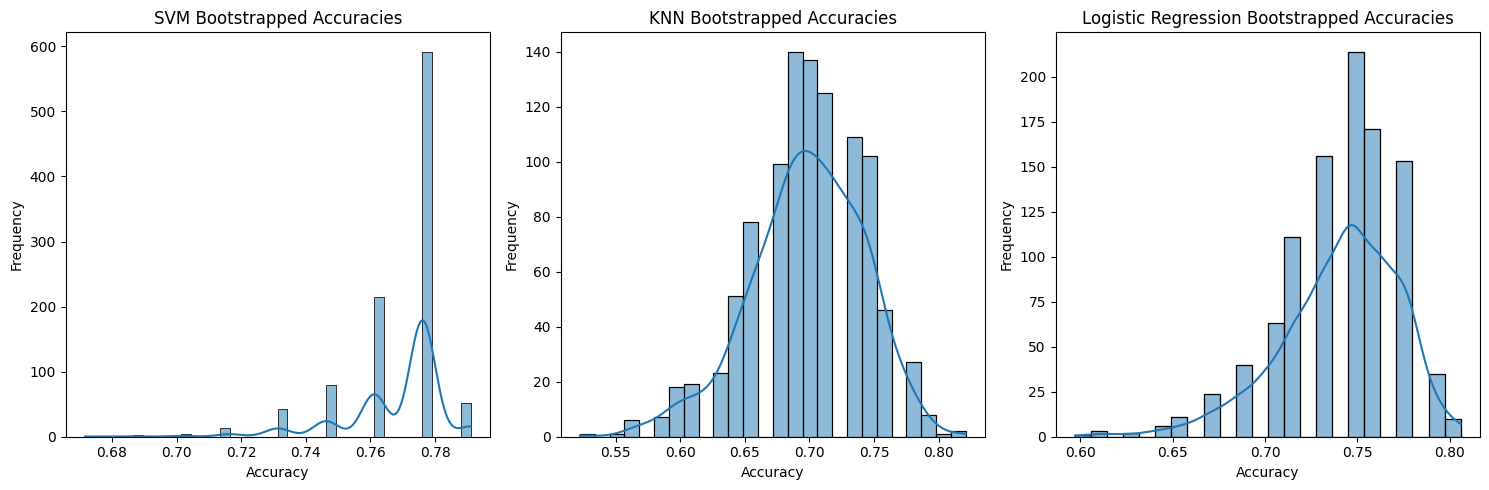

{'SVM': 0.7761194029850746,
 'KNN': 0.7761194029850746,
 'Logistic Regression': 0.7761194029850746}

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/breast_cancer_survival.csv')

data = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)
data['Patient_Status'] = LabelEncoder().fit_transform(data['Patient_Status'])

categorical_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data.drop('Patient_Status', axis=1)
y = data['Patient_Status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)

bootstrap_results = {}
for model_name, model in models.items():
    bootstrapped_accuracies = []
    for _ in range(1000):
        X_resampled, y_resampled = resample(X_train, y_train)
        model.fit(X_resampled, y_resampled)
        y_pred_resampled = model.predict(X_test)
        bootstrapped_accuracies.append(accuracy_score(y_test, y_pred_resampled))
    bootstrap_results[model_name] = bootstrapped_accuracies

plt.figure(figsize=(15, 5))
for i, (model_name, bootstrapped_accuracies) in enumerate(bootstrap_results.items(), 1):
    plt.subplot(1, 3, i)
    sns.histplot(bootstrapped_accuracies, kde=True)
    plt.title(f'{model_name} Bootstrapped Accuracies')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

accuracy_results
